In [ ]:
!gdown 1SzSDC6HSetoxk7NY91-h7NTU282OJsos

Downloading...
From: https://drive.google.com/uc?id=1SzSDC6HSetoxk7NY91-h7NTU282OJsos
To: /content/Wildfire Smoke.v1-raw.voc-20231204T114600Z-001.zip
100% 29.6M/29.6M [00:00<00:00, 71.3MB/s]


In [ ]:
import zipfile
import os

zip_file_path = '/content/Wildfire Smoke.v1-raw.voc-20231204T114600Z-001.zip'
folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)


Shape of each image: (240, 320, 3)


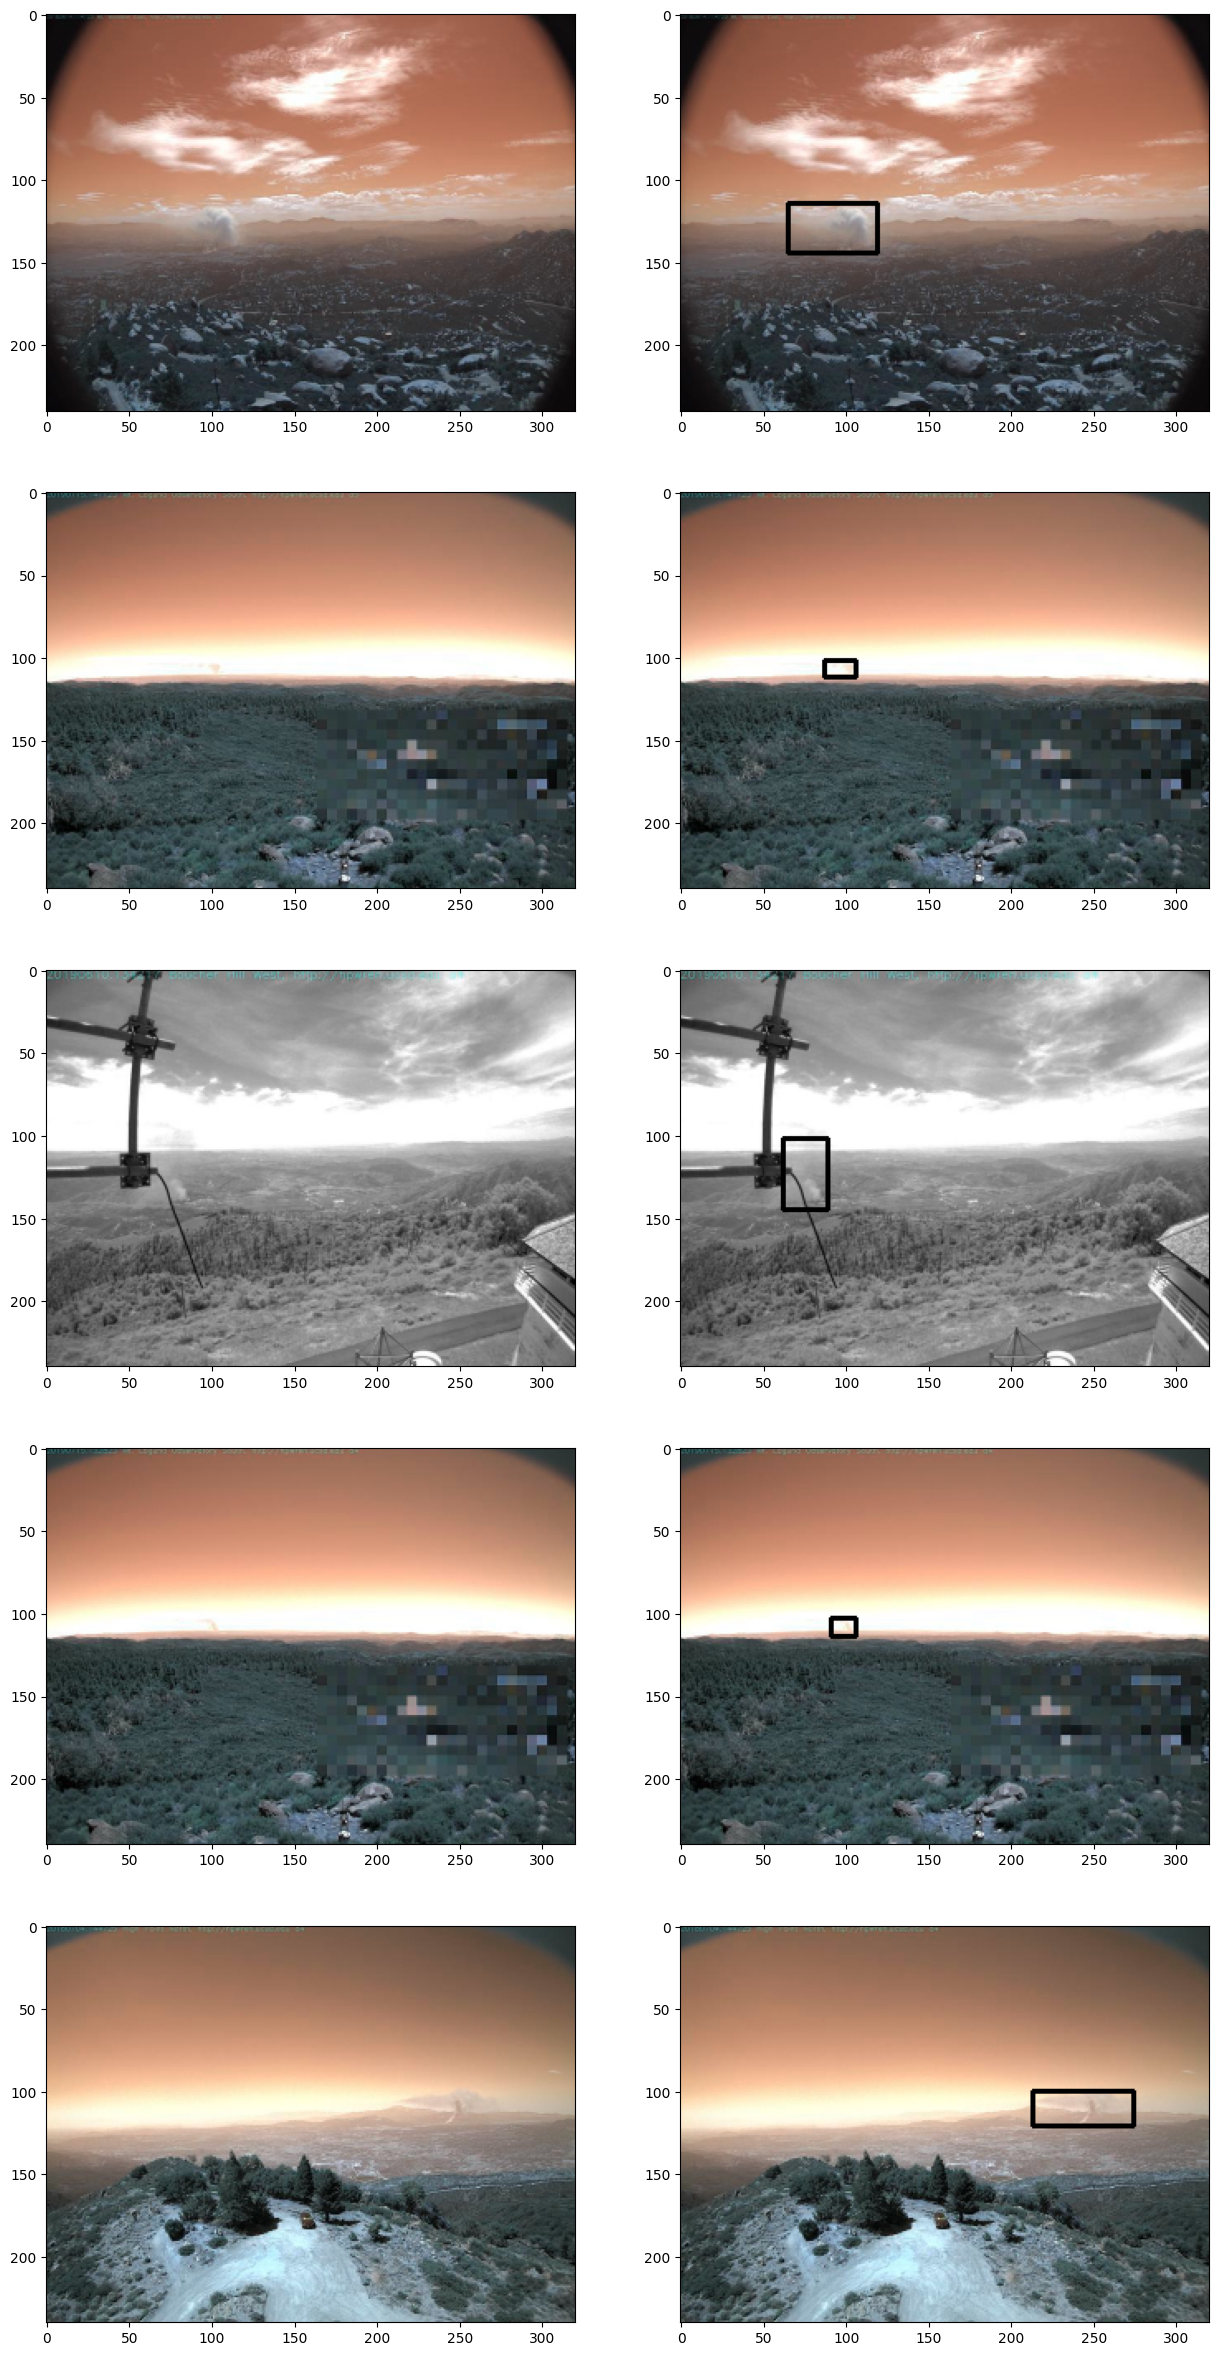

In [ ]:
from xml.dom.minidom import parse
import xml.dom.minidom
from google.colab.patches import cv2_imshow
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
i=0
train_dir_data_path= "/content/Dataset/Wildfire Smoke.v1-raw.voc/train/*.jpg"
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
train_images=[]
train_bboxes=[]
labels=[]
for item in glob.glob(train_dir_data_path):
  image = cv2.imread(item)
  image= cv2.resize(image, (320,240))
  xmlPath = item.replace(".jpg",".xml")
  xmlTree = parse(xmlPath)
  annotation = xmlTree.getElementsByTagName("annotation")[0]
  obj = annotation.getElementsByTagName("object")[0]
  label= obj.getElementsByTagName("name")[0].childNodes[0].data
  bndbox =obj .getElementsByTagName("bndbox")[0]
  xmin =int(int(bndbox.getElementsByTagName("xmin")[0].childNodes[0].data)*0.5)
  xmax =int(int(bndbox.getElementsByTagName("xmax")[0].childNodes[0].data)*0.5)
  ymin = int(int(bndbox.getElementsByTagName("ymin")[0].childNodes[0].data)*0.5)
  ymax = int(int(bndbox.getElementsByTagName("ymax")[0].childNodes[0].data)*0.5)
  # print(xmin)
  nudeImage = np.copy(image)
  train_images.append(nudeImage)
  labels.append(label)
  train_bboxes.append([xmin, xmax, ymin, ymax])
  if i<5:
    image = cv2.rectangle(image, (xmin,ymin), (xmax,ymax),(0,0,0), 2)
    ax[i][0].imshow(nudeImage)
    ax[i][1].imshow(image)
    i=i+1

  pass

img = train_images[0]
print(f"Shape of each image: {img.shape}")

In [ ]:
import pandas as pd
data= pd.array(labels)
pd.unique(data)

<StringArray>
['smoke']
Length: 1, dtype: string

In [ ]:
valid_dir_data_path= "/content/Dataset/Wildfire Smoke.v1-raw.voc/valid/*.jpg"
valid_images=[]
valid_bboxes=[]
for item in glob.glob(valid_dir_data_path):
  image = cv2.imread(item)
  image= cv2.resize(image, (320,240))
  xmlPath = item.replace(".jpg",".xml")
  xmlTree = parse(xmlPath)
  annotation = xmlTree.getElementsByTagName("annotation")[0]
  obj = annotation.getElementsByTagName("object")[0]
  bndbox =obj .getElementsByTagName("bndbox")[0]
  xmin =int(int(bndbox.getElementsByTagName("xmin")[0].childNodes[0].data)*0.5)
  xmax =int(int(bndbox.getElementsByTagName("xmax")[0].childNodes[0].data)*0.5)
  ymin = int(int(bndbox.getElementsByTagName("ymin")[0].childNodes[0].data)*0.5)
  ymax = int(int(bndbox.getElementsByTagName("ymax")[0].childNodes[0].data)*0.5)
  # print(xmin)
  nudeImage = np.copy(image)
  valid_images.append(nudeImage)
  valid_bboxes.append([xmin, xmax, ymin, ymax])
  pass

In [ ]:
test_dir_data_path= "/content/Dataset/Wildfire Smoke.v1-raw.voc/test/*.jpg"
test_images=[]
test_bboxes=[]
for item in glob.glob(test_dir_data_path):
  image = cv2.imread(item)
  image= cv2.resize(image, (320,240))
  xmlPath = item.replace(".jpg",".xml")
  xmlTree = parse(xmlPath)
  annotation = xmlTree.getElementsByTagName("annotation")[0]
  obj = annotation.getElementsByTagName("object")[0]
  bndbox =obj .getElementsByTagName("bndbox")[0]
  xmin =int(int(bndbox.getElementsByTagName("xmin")[0].childNodes[0].data)*0.5)
  xmax =int(int(bndbox.getElementsByTagName("xmax")[0].childNodes[0].data)*0.5)
  ymin = int(int(bndbox.getElementsByTagName("ymin")[0].childNodes[0].data)*0.5)
  ymax = int(int(bndbox.getElementsByTagName("ymax")[0].childNodes[0].data)*0.5)
  # print(xmin)
  nudeImage = np.copy(image)
  test_images.append(nudeImage)
  test_bboxes.append([xmin, xmax, ymin, ymax])
  pass

feature maps

In [ ]:
import pickle
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and batch size
batch_size = 16

# Create data generator for feature extraction
data_generator = ImageDataGenerator(
    rescale=1./255
)

# Load VGG16 base model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img.shape)

from keras import activations
base_model.layers[-1].activation = activations.linear

base_model_output_shape = base_model.output_shape[1:]
print("Output shape of the base model:", base_model_output_shape)
base_model.summary()

Output shape of the base model: (7, 10, 512)
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 320, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 320, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 320, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 160, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 160, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 160, 128)     147584    
                                                                 
 block2_pool (Ma

In [ ]:
# Extract features using VGG16
train_features = base_model.predict(data_generator.flow(np.array(train_images), train_bboxes, batch_size= batch_size))

valid_features = base_model.predict(data_generator.flow(np.array(valid_images), valid_bboxes, batch_size= batch_size))

test_features = base_model.predict(data_generator.flow(np.array(test_images), test_bboxes, batch_size= batch_size))

print(train_features.shape)

5/5 [==============================] - 2s 497ms/step
(516, 7, 10, 512)


In [ ]:
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Flatten


# Create the RPN classification branch
rpn_cls = GlobalAveragePooling2D()(base_model.output)
rpn_cls = Conv2D(512, (3, 3), activation='relu')(rpn_cls)
rpn_cls = Flatten()(rpn_cls)
rpn_cls = Dense(2, activation='softmax', name='rpn_cls')(rpn_cls)  #2 classes (positive, negative)

# Create the RPN bounding box regression branch
rpn_reg = GlobalAveragePooling2D()(base_model.output)
rpn_reg =Conv2D(18, (1, 1), activation='relu')(rpn_reg)  # Assuming 4 values for bounding box regression

# Combine both branches
rpn_model = Model(inputs=base_model.input, outputs=[rpn_cls, rpn_reg])

# Optionally, you can choose to freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the RPN model
rpn_model.compile(optimizer='adam',
                  loss={'rpn_cls': 'categorical_crossentropy', 'rpn_reg': 'mae'},
                  metrics={'rpn_cls': 'accuracy', 'rpn_reg': 'mae'})

# Display the modified RPN model summary
rpn_model.summary()